In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traffic = pd.read_csv('/Users/hannahpaxton/Desktop/Projects/Dataquest/interstate_traffic/Metro_Interstate_Traffic_Volume.csv')

print(traffic.head())
print(traffic.tail())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0   

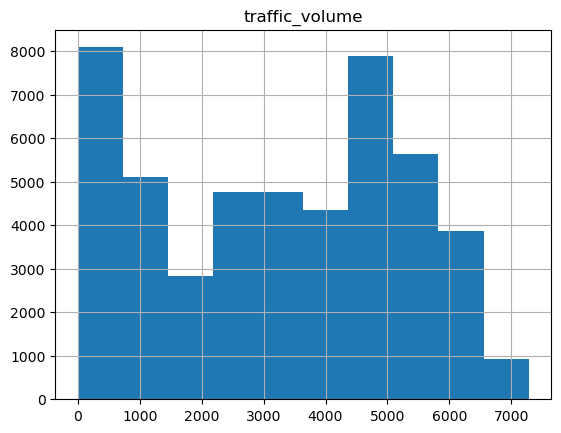

In [46]:
traffic.hist(column="traffic_volume")
plt.show()

In [47]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [48]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].head(10)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]

In [67]:
traffic['hour'] = traffic['date_time'].dt.hour
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [93]:
daytime = traffic[(traffic['hour'] >=7) & (traffic['hour'] < 19)]
nighttime = traffic[(traffic['hour'] >= 19) | (traffic['hour'] < 7)]

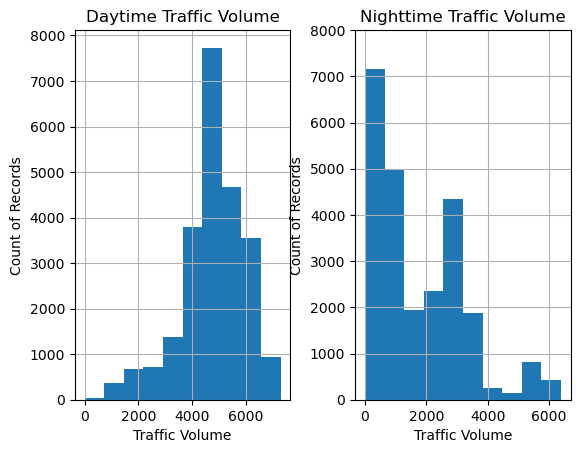

In [165]:
fig, axes = plt.subplots(nrows=1, ncols=2)

daytime.hist(column="traffic_volume", ax=axes[0])
nighttime.hist(column="traffic_volume", ax=axes[1])

axes[0].set_title('Daytime Traffic Volume')
axes[0].set_xlabel('Traffic Volume')
axes[0].set_ylabel('Count of Records')

axes[1].set_title('Nighttime Traffic Volume')
axes[1].set_xlabel('Traffic Volume')
axes[1].set_ylabel('Count of Records')

plt.ylim([0,8000])


plt.show()

In [127]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [129]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [131]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

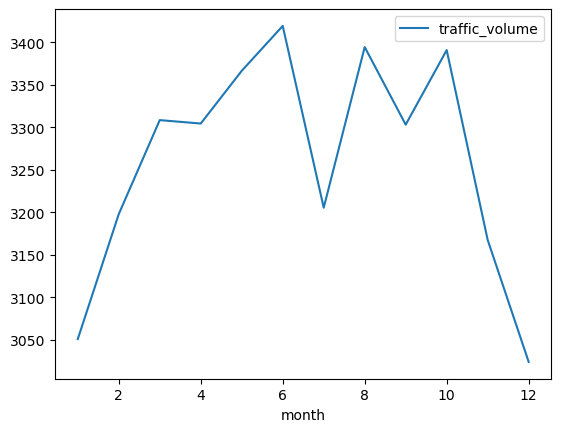

In [135]:
by_month.plot(y='traffic_volume')
plt.show()

In [137]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

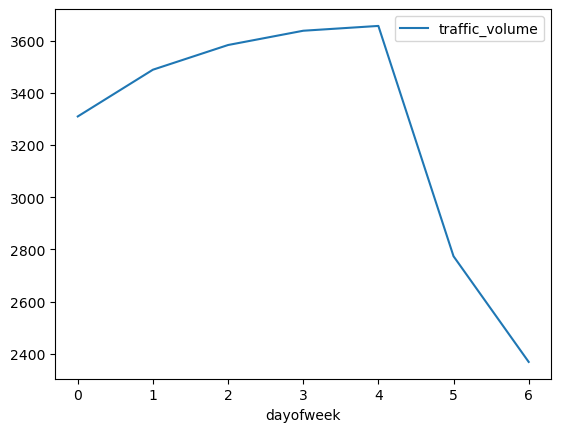

In [139]:
by_dayofweek.plot(y='traffic_volume')
plt.show()

In [145]:
business_days = traffic.copy()[traffic['dayofweek'] <= 4]
weekend = traffic.copy()[traffic['dayofweek'] >= 5]

by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


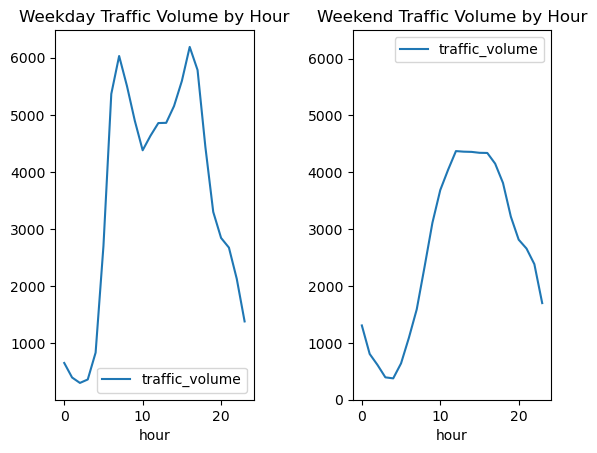

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

by_hour_business.plot(y='traffic_volume', ax=axes[0])
by_hour_weekend.plot(y='traffic_volume', ax=axes[1])

axes[0].set_title('Weekday Traffic Volume by Hour')
axes[1].set_title('Weekend Traffic Volume by Hour')

plt.ylim([0,6500])
plt.show()


In [34]:
traffic.corr(numeric_only=True)['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

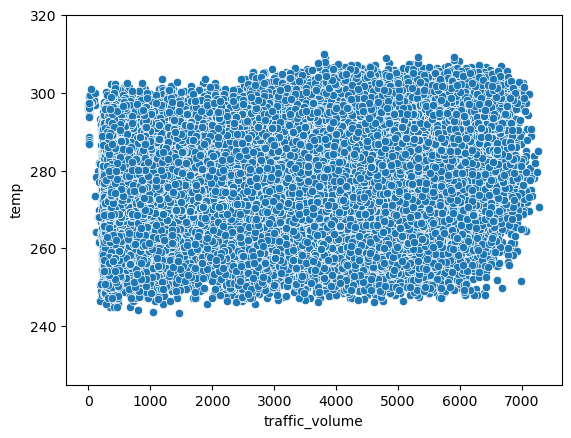

In [40]:
sns.scatterplot(data=traffic, x='traffic_volume', y='temp')
plt.ylim(225, 320)
plt.show()